<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:  The inputs that are taken into the model
### Hidden Layer: The layer that computes based on weights
### Output Layer:  The layer that returns the value/prediction
### Neuron: One of the nodes that has weights
### Weight: How important something is
### Activation Function: The mathematical formula that determine the output given an input
### Node Map: A Map of nodes! The graphs that we've been seeing lately
### Perceptron: An early version of neural networks


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [10]:
##### Your Code Here #####
class Perceptron(object):
    def __init__(self, rate=0.01, niter=10):
        self.rate = rate
        self.niter = niter
    
    def fit(self, X, y):
        """Fit training data
        X: Training vectors, X.shape : [#Samples, #features]
        y: Target values, y.shape : [#samples]"""
        
        # weights
        self.weight = np.zeros(1 + X.shape[1])
        # no. of misclassificaiton
        self.errors = [] # Number of misclassifications
        for i in range(self.niter):
            error = 0
            for xi, target in zip(X, y):
                predicted = self.predict(xi)
                delta_w = self.rate * (target - predicted)
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                if delta_w != 0.0:
                    error += 1
            self.errors.append(error)
        return self
    
    def net_input(self, X):
            """Calculate net input"""
            return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [11]:
pn = Perceptron()
X = df[['x1', 'x2']].values
y = df['y'].values
pn.fit(X, y)

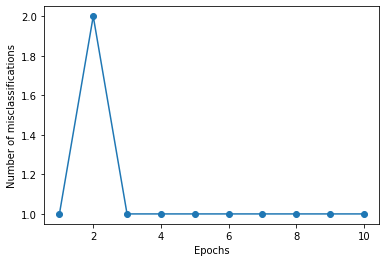

In [12]:
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [88]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [89]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X_train = Normalizer().fit_transform(diabetes[feats][:600].values)
y_train = diabetes['Outcome'][:600]

X_test = Normalizer().fit_transform(diabetes[feats][600:].values)
y_test = diabetes['Outcome'][600:]

In [90]:
print(X)

[[0.03355237 0.82762513 0.40262844 ... 0.18789327 0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 ... 0.22407851 0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 ... 0.11765825 0.00339341 0.16159073]
 ...
 [0.02691539 0.65135243 0.38758161 ... 0.14103664 0.00131885 0.16149234]
 [0.00665306 0.83828547 0.39918356 ... 0.20025708 0.00232192 0.31269379]
 [0.00791454 0.73605211 0.55401772 ... 0.24060198 0.00249308 0.18203439]]


In [91]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx/(1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.random.rand(X.shape[1])
        # Weighted sum of inputs / weights
        weighted_sum = np.dot(X, self.weight)
        # Activate!
        activated_output = self.__sigmoid(weighted_sum)
        # Cac error
        error = y - activated_output
        # Update the Weights
        adjustments = error * self.__sigmoid_derivative(activated_output)
        
        self.weight += np.dot(X.T, adjustments)
        
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(row, weights):
        return [weight*x for x in X]

In [92]:
pn = Perceptron()
pn.fit(X_train, y_train)

In [96]:
predictions = pn.predict(X_test)

In [97]:
print(predictions)

[array([0.02591702, 0.31118364, 0.25666919, 0.01349693, 0.        ,
       0.11118289, 0.00115863, 0.16379121]), array([0.00650699, 0.26922822, 0.35443108, 0.01684657, 0.        ,
       0.13259494, 0.00097708, 0.15297797]), array([0.03120457, 0.34745666, 0.20602301, 0.        , 0.        ,
       0.06962242, 0.00112135, 0.09465969]), array([0.00510733, 0.22126131, 0.27819262, 0.01048709, 0.13208304,
       0.10994246, 0.00036488, 0.08133928]), array([0.        , 0.22423879, 0.11100342, 0.01050679, 0.15541868,
       0.11102252, 0.00329132, 0.08415301]), array([0.02696644, 0.30453193, 0.32937662, 0.        , 0.        ,
       0.10576901, 0.00046376, 0.12270483]), array([0.01681235, 0.2127762 , 0.23125155, 0.01600996, 0.1356797 ,
       0.13308643, 0.00059457, 0.11050129]), array([0.06222011, 0.34829714, 0.        , 0.        , 0.        ,
       0.16825595, 0.00035668, 0.1368408 ]), array([2.63273225e-03, 1.26230478e-01, 7.60470294e-02, 5.28837696e-03,
       1.96653457e-01, 3.0756824

In [62]:
print(weight2)

[[0.6513263 ]
 [0.23124166]
 [0.12806546]
 [0.19153227]
 [0.92467783]
 [0.93067062]
 [0.93507926]
 [0.49554537]]


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?